# Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import RESSPyLab

# 1 - Load an experiment

Make a list of pandas dataframes with (clean) experimental data from a csv file. This is done with the pandas package from data in csv files. Two columns should be included in the csv file with true strain ("e_true") and true stress ("Sigma_true"). 

In [2]:

testFileNames=['example_1.csv']


listCleanTests=[]

for testFileName in testFileNames:
    
    test=pd.read_csv(testFileName)
    
    listCleanTests.append(test)



# 2 - Determine Voce and Chaboche material parameters with VCopt

There are two arguments to VCopt: an initial starting point for the parameters ("x_0") and the list of tests previously assembled.

The parameters are gathered in list in the following order:

[E, sy0, Qinf, b, C_1, gamma_1, C_2, gamma_2, ..., ..., C_k, gamma_k]

A recommended initial point is an elastic perfectly plastic model with the nominal values of the elastic modulus and the yield stress. All other values are, therefore, set to zero. For numerical purposes a minimum 1e-1 is used.

The examples herein are from an S355J2 steel. Nominal values are therefore: E=200e3MPa sy0=355MPa

In [3]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 9933.48495499 ; norm_grad:3588.31901868
It. 1 ; Function: 9067.80389983 ; norm_grad:2846.39218019
It. 2 ; Function: 7543.75373335 ; norm_grad:1681.68250549
It. 3 ; Function: 5167.08511783 ; norm_grad:708.82121286
It. 4 ; Function: 3881.31734845 ; norm_grad:299.320896547
It. 5 ; Function: 3707.53836398 ; norm_grad:126.789565685
It. 6 ; Function: 3659.77225727 ; norm_grad:54.0479570662
It. 7 ; Function: 3639.10924142 ; norm_grad:23.6119350987
It. 8 ; Function: 3628.49846592 ; norm_grad:11.0702920428
It. 9 ; Function: 3621.49906287 ; norm_grad:6.57880198485
It. 10 ; Function: 3614.54383935 ; norm_grad:7.74561568779
It. 11 ; Function: 3546.05753092 ; norm_grad:7.74561568779
It. 12 ; Function: 3546.05753092 ; norm_grad:7.74561568779
It. 13 ; Function: 3546.05753092 ; norm_grad:4.85236834189
It. 14 ; Function: 3504.17493568 ; norm_grad:3.85199915508
It. 15 ; Function: 3463.78988454 ; norm_grad:2.57489953555
It. 16 ; Function: 3399.52702689 ; norm_grad:1.18588331078
It. 17 ;

# 3 - Use the solution point to plot experiment vs simulation

In [4]:
simCurve=RESSPyLab.VCsimCurve(sol,test)

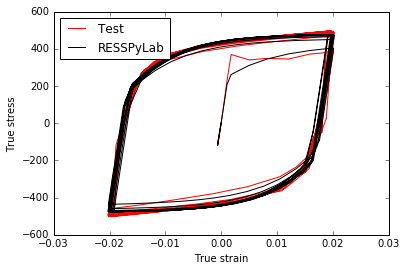

In [5]:
plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')

# 4 - Exam with multiple tests

In [6]:

testFileNames=['example_1.csv','example_2.csv']


listCleanTests=[]

for testFileName in testFileNames:
    
    test=pd.read_csv(testFileName)
    
    listCleanTests.append(test)



In [7]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 17569.3186319 ; norm_grad:3589.95473452
It. 1 ; Function: 16713.8611163 ; norm_grad:2832.55095283
It. 2 ; Function: 15167.5154906 ; norm_grad:1667.3525847
It. 3 ; Function: 12676.303278 ; norm_grad:704.189121525
It. 4 ; Function: 10875.0860507 ; norm_grad:299.326157445
It. 5 ; Function: 10514.4969117 ; norm_grad:128.406076662
It. 6 ; Function: 10363.3283279 ; norm_grad:60.5474486002
It. 7 ; Function: 10315.7425111 ; norm_grad:29.4842766081
It. 8 ; Function: 10143.3836248 ; norm_grad:24.6871888212
It. 9 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 10 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 11 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 12 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 13 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 14 ; Function: 10099.1211175 ; norm_grad:24.6871888212
It. 15 ; Function: 10099.1211175 ; norm_grad:28.7046636586
It. 16 ; Function: 9706.68585988 ; norm_grad:28.7046636586
It. 17 ; 

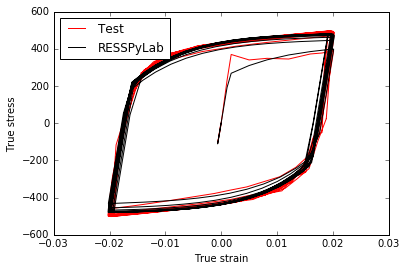

In [8]:
test=pd.read_csv('example_1.csv')

simCurve=RESSPyLab.VCsimCurve(sol,test)

plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')

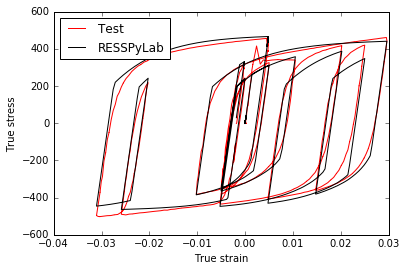

In [9]:
test=pd.read_csv('example_2.csv')

simCurve=RESSPyLab.VCsimCurve(sol,test)

plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')